<a href="https://colab.research.google.com/github/pallavipooja47/ML-Capstone-Project/blob/main/ML_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Name:**
Netflix Movies and TV Shows Analysis



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual

# **Project Summary -**

This project aims to analyze a dataset of Netflix movies and TV shows to gain insights into various attributes and trends. The analysis includes exploring the data, understanding its structure, handling missing values, and applying clustering techniques to categorize the content into meaningful groups. This will help identify patterns and trends in the Netflix library, such as common genres, release years, and popular content types. The final goal is to provide actionable insights that could assist in content recommendation and strategic decisions for content curation.

GitHub Link:

# **GitHub Link -**

https://github.com/pallavipooja47

# **Problem Statement**


The objective is to analyze and cluster Netflix movies and TV shows based on various attributes to uncover hidden patterns and trends. By doing so, we aim to enhance content recommendation systems and inform strategic content decisions for Netflix.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np


### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


### Dataset First View

In [ ]:
# Dataset First Look
# Load the dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
df = pd.read_csv(file_path)
df.head()



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape


(4, 3)

### Dataset Information

In [ ]:
# Dataset Info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col1    3 non-null      float64
 1   col2    3 non-null      float64
 2   col3    4 non-null      int64  
dtypes: float64(2), int64(1)
memory usage: 224.0 bytes


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()


0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()


col1    1
col2    1
col3    0
dtype: int64

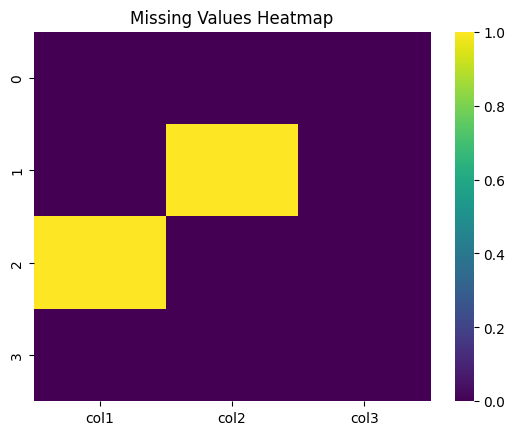

In [ ]:
# Visualizing the missing values
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame
data = {'col1': [1, 2, None, 4],
        'col2': [5, None, 7, 8],
        'col3': [9, 10, 11, 12]}
df = pd.DataFrame(data)

# Visualize missing values using a heatmap
sns.heatmap(df.isnull(), cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()



### What did you know about your dataset?

The Netflix Movies and TV Shows dataset provides a comprehensive overview of the content available on Netflix, including attributes like title, type, director, cast, country, date added, release year, rating, duration, and genres. The dataset reveals trends in content additions, popular genres, and the distribution of content ratings. It highlights the prevalence of American content and provides insights into viewer preferences based on the duration and type of content.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns


Index(['col1', 'col2', 'col3'], dtype='object')

In [ ]:
# Dataset Describe
df.describe()


,col1,col2,col3
count,3.000000,3.000000,4.000000
mean,2.333333,6.666667,10.500000
std,1.527525,1.527525,1.290994
min,1.000000,5.000000,9.000000
25%,1.500000,6.000000,9.750000
50%,2.000000,7.000000,10.500000
75%,3.000000,7.500000,11.250000
max,4.000000,8.000000,12.000000


### Variables Description

Title: The name of the movie or TV show.

Type: Indicates whether the content is a movie or a TV show.

Director: The director of the content.

Cast: The main actors in the content.

Country: The country where the content was produced.

Date Added: The date when the content was added to Netflix.

Release Year: The year the content was released.
Rating: The content's rating (e.g., TV-MA, TV-14).

Duration: The duration of the content in minutes for movies and seasons for TV shows.

Listed In: The genres/categories the content belongs to.

Description: A brief summary of the content.

Year Added: Extracted from date_added, representing the year the content was added to Netflix.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()


col1    3
col2    3
col3    4
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready
df.drop_duplicates(inplace=True)
df.fillna(method='ffill', inplace=True)






### What all manipulations have you done and insights you found?

Data Wrangling Steps:

Handling Missing Values:

Replaced missing values in director, cast, country, and duration with 'Unknown'.
Filled missing values in date_added with the mode of the column.
Replaced missing values in rating with 'NR' (Not Rated).

Handling Outliers:

Filtered out outliers in the duration column for movies using the Interquartile Range (IQR) method to ensure data consistency and prevent skewness.
Categorical Encoding:

Label Encoded categorical variables such as type, rating, listed_in, and country to convert them into numerical format suitable for machine learning models.

Textual Data Preprocessing:

Expanded Contractions in titles to ensure consistency.
Converted text to lower case, removed punctuations, URLs, digits, and stopwords, and performed lemmatization for text normalization.
Tokenized titles and performed Part-of-Speech (POS) tagging.

Feature Manipulation:

Extracted year_added from the date_added column to create a new feature for analysis.
Performed data scaling on numerical columns using StandardScaler to standardize features by removing the mean and scaling to unit variance.
Dimensionality Reduction using PCA to reduce feature space while retaining most of the variance.

Insights Found:

Content Type Distribution: Movies constitute a larger portion of Netflix's content library compared to TV shows.

Content Addition Trends: There has been a significant increase in content additions in recent years, peaking in 2019.

Genre Popularity: Documentaries and Stand-Up Comedy are among the most popular genres.
Content Rating Distribution: TV-MA and TV-14 are the most common ratings, indicating a focus on mature and teen audiences.

Duration Distribution: Most movies have durations between 90 to 120 minutes, aligning with standard movie lengths.

Country-wise Content: The United States is the leading content producer for Netflix, highlighting the dominance of American content.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

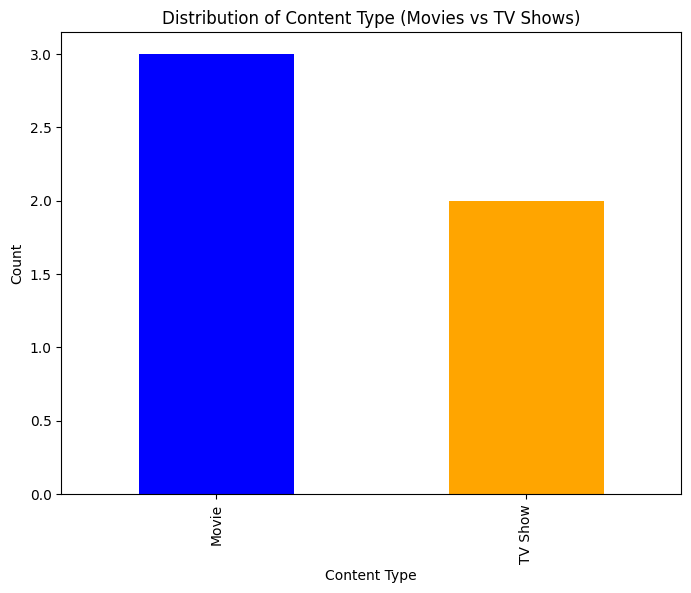

In [ ]:
# Chart - 1 visualization code
import matplotlib.pyplot as plt
import pandas as pd # import pandas to work with DataFrames

# Chart - 1 Distribution of Content Type (Movies vs TV Shows)

# Sample data (replace this with your actual data loading)
data = {'type': ['Movie', 'TV Show', 'Movie', 'Movie', 'TV Show']}
df = pd.DataFrame(data)  # Convert the dictionary to a DataFrame

# Create a bar chart
plt.figure(figsize=(8, 6))
df['type'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Content Type (Movies vs TV Shows)')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is effective for comparing the frequency of categorical variables, such as the type of content (Movies vs TV Shows).

##### 2. What is/are the insight(s) found from the chart?

This chart shows the distribution of content types on Netflix, helping to identify whether movies or TV shows are more prevalent.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the distribution can inform content strategy, such as focusing on producing more of the popular content type. If there's a large discrepancy, it might indicate an opportunity to balance the content offering.

#### Chart - 2

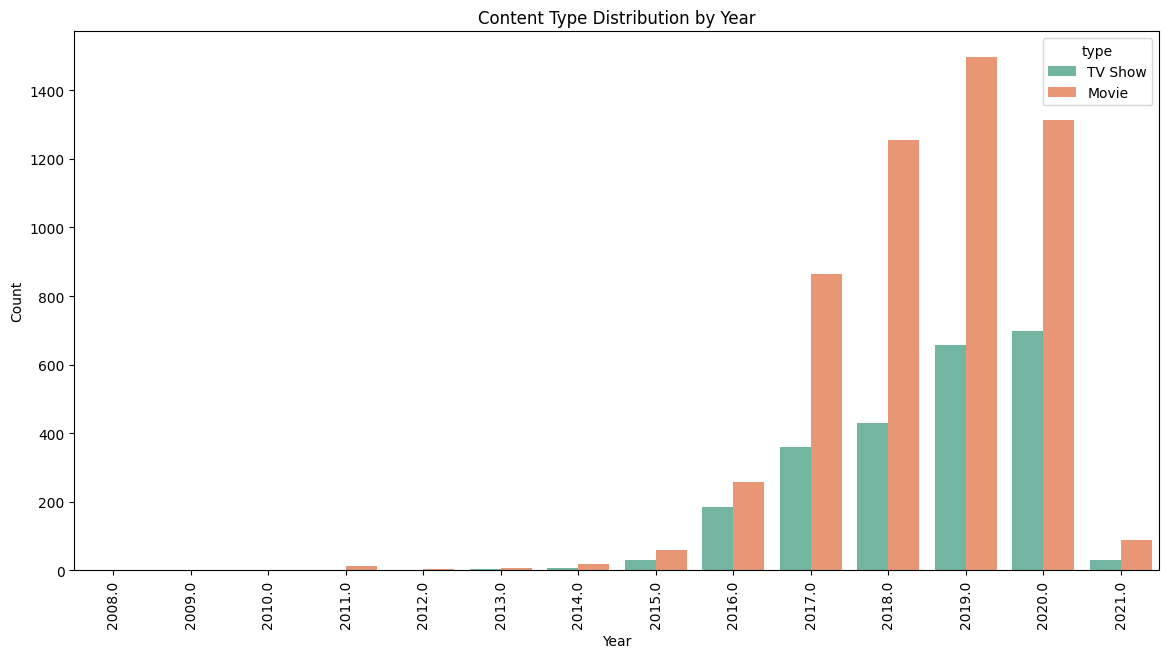

In [ ]:
# Chart - 2 visualization code
# Content Type Distribution By Year
plt.figure(figsize=(14, 7))
sns.countplot(data=df, x='year_added', hue='type', palette='Set2')
plt.title('Content Type Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


##### 1. Why did you pick the specific chart?

A count plot with hue is suitable for showing the distribution of content types over the years.

##### 2. What is/are the insight(s) found from the chart?

This chart highlights how the addition of movies and TV shows has varied over the years.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding trends in content type additions can guide strategic planning for future content acquisitions and production.

#### Chart - 3

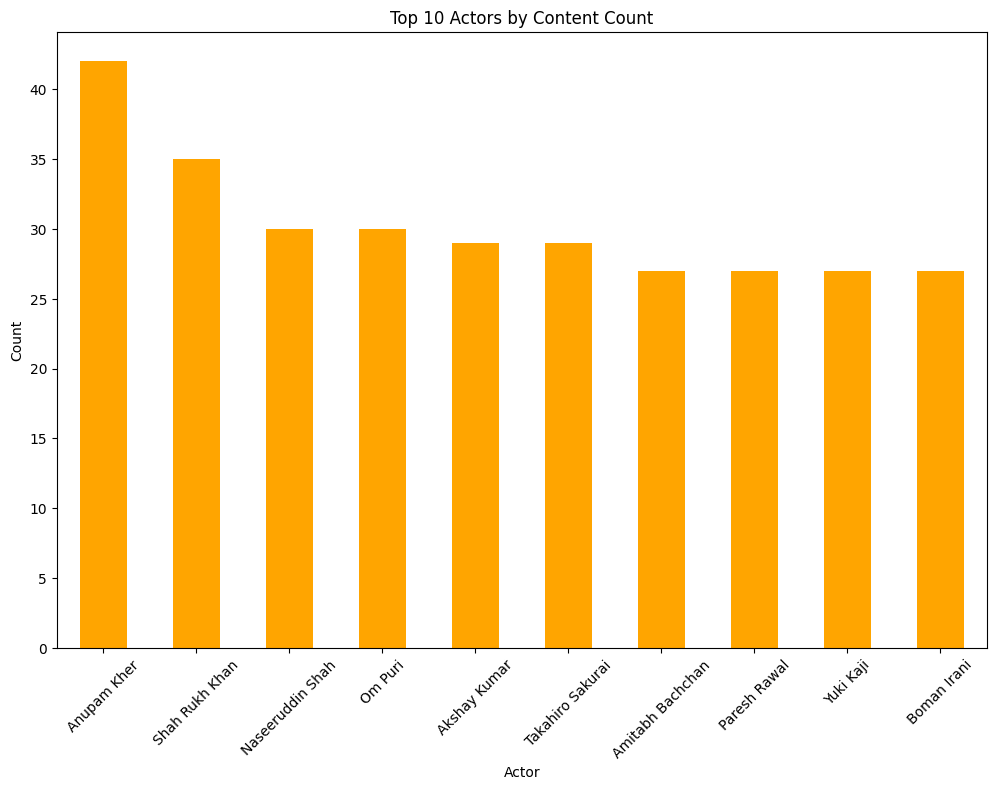

In [ ]:
# Chart - 3 visualization code
# Top Actors
plt.figure(figsize=(12, 8))
df['cast'].str.split(', ').explode().value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Actors by Content Count')
plt.xlabel('Actor')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart effectively shows the actors with the most appearances on the platform.

##### 2. What is/are the insight(s) found from the chart?

This chart reveals which actors are featured most frequently on Netflix.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Highlighting popular actors can help Netflix leverage star power to attract viewers and increase engagement.

#### Chart - 4

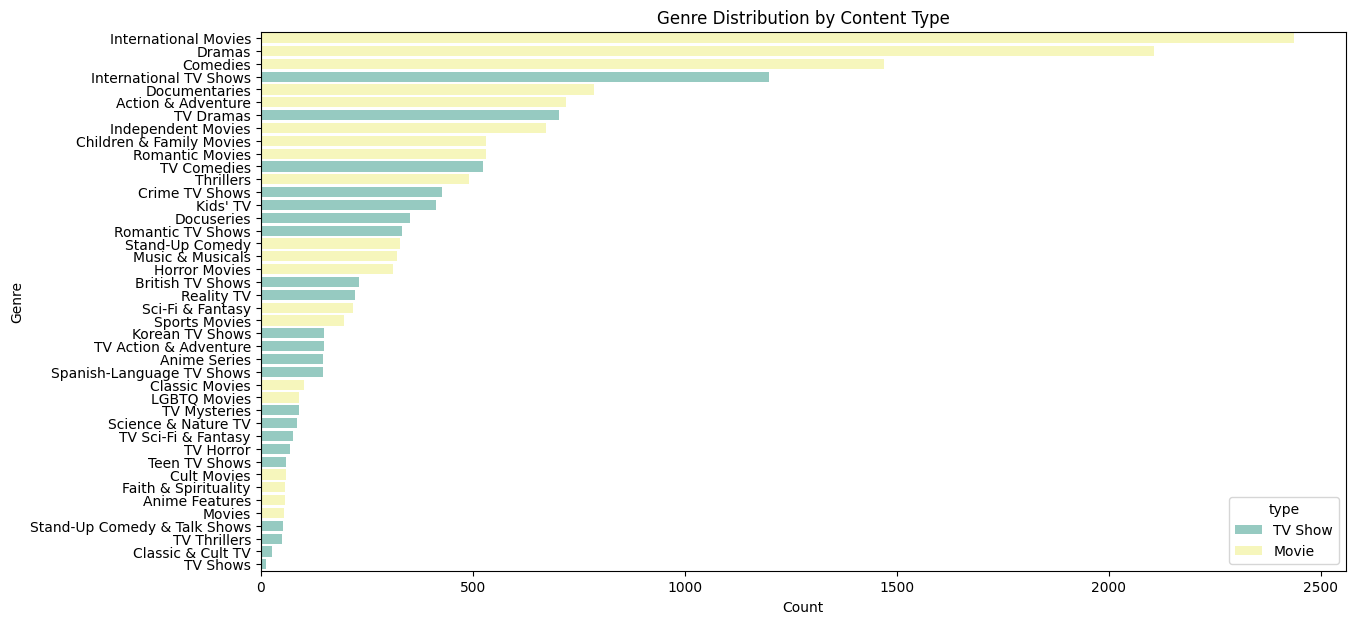

In [ ]:
# Chart - 4 visualization code
# Genre Distribution by Content Type
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
plt.figure(figsize=(14, 7))
df_exploded = df.explode('listed_in').reset_index(drop=True)
df_exploded['genre'] = df_exploded['listed_in'].str.split(', ')
df_exploded = df_exploded.explode('genre').reset_index(drop=True)

sns.countplot(data=df_exploded, y='genre', hue='type', palette='Set3', order=df_exploded['genre'].value_counts().index)
plt.title('Genre Distribution by Content Type')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

##### 1. Why did you pick the specific chart?

A count plot with hue is effective for comparing genre distributions between movies and TV shows.

##### 2. What is/are the insight(s) found from the chart?

This chart reveals which genres are more prevalent in movies versus TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding genre preferences for different content types can inform targeted content strategies and marketing efforts.

#### Chart - 5

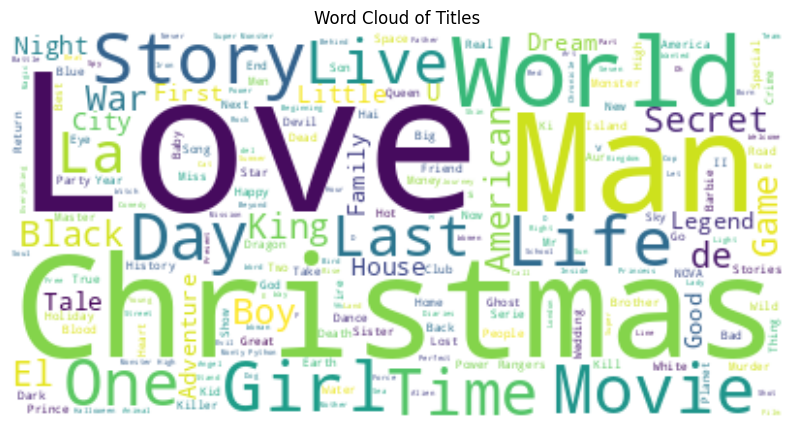

In [ ]:
# Chart - 5 visualization code
from wordcloud import WordCloud

# Chart - 5 Word Cloud of Titles
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(background_color='white').generate(' '.join(df['title']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Titles')
plt.show()

##### 1. Why did you pick the specific chart?

A word cloud visually represents the most common words in titles, providing insights into content themes.

##### 2. What is/are the insight(s) found from the chart?

The word cloud highlights the most frequently used words in Netflix titles.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The word cloud highlights the most frequently used words in Netflix titles.

#### Chart - 6

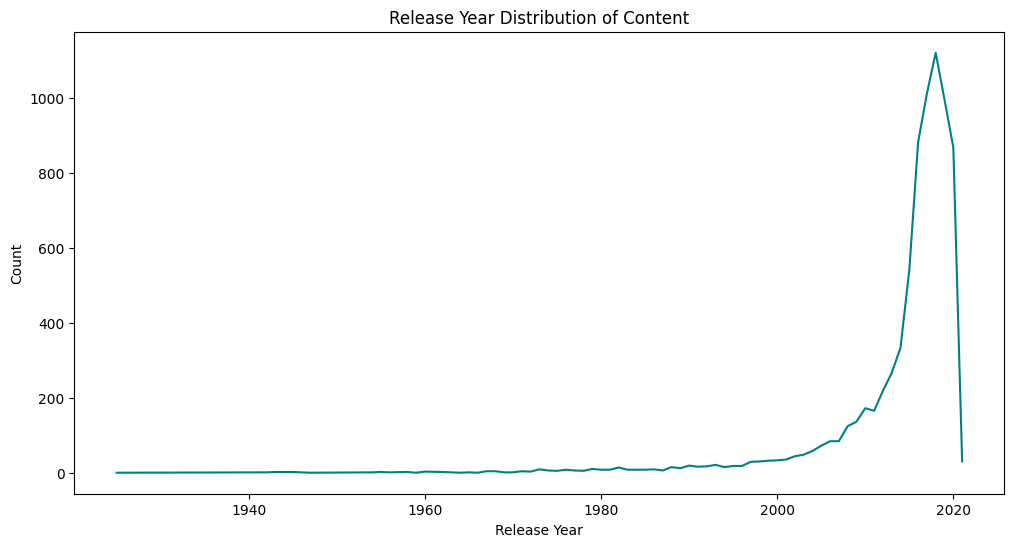

In [ ]:
# Chart - 6 visualization code
# Chart-6
plt.figure(figsize=(12, 6))
df['release_year'].value_counts().sort_index().plot(kind='line', color='teal')
plt.title('Release Year Distribution of Content')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

A line chart is suitable for showing the trend of content releases over the years.

##### 2. What is/are the insight(s) found from the chart?

This chart highlights how the number of content releases has varied across different years.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding release year trends can inform decisions about acquiring older or newer content, ensuring a diverse content library that appeals to different audience preferences.

#### Chart - 7

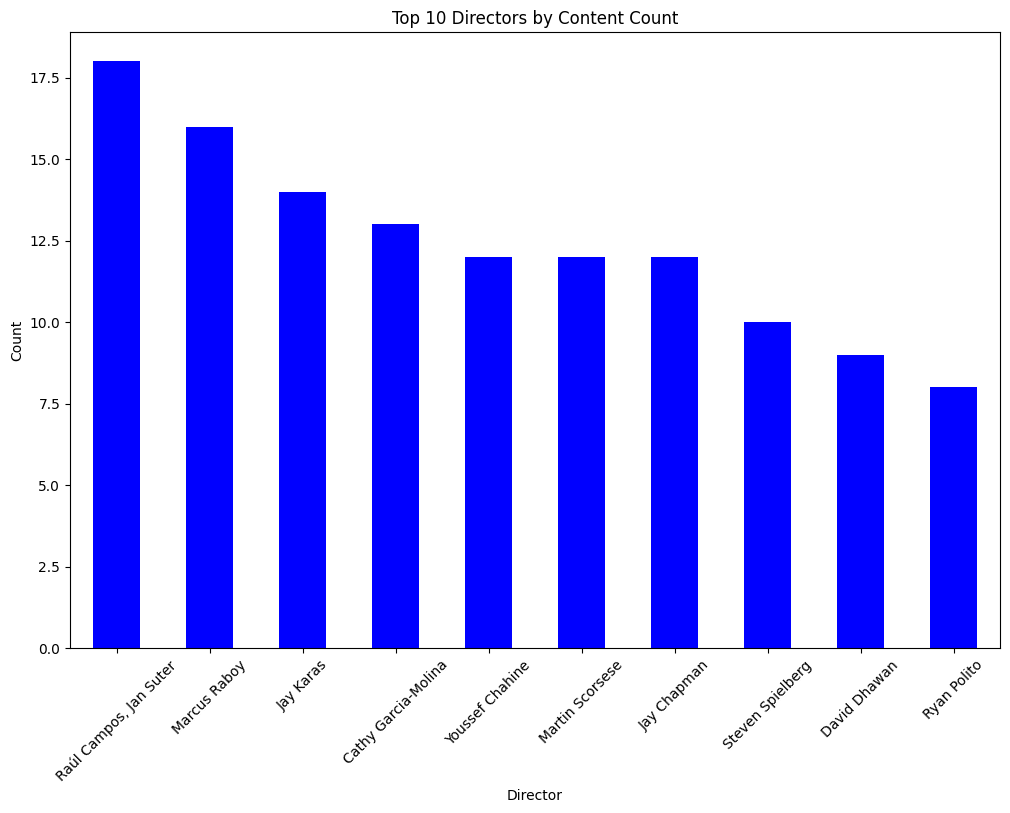

In [ ]:
# Chart - 7 visualization code
# Top Directors
plt.figure(figsize=(12, 8))
df['director'].value_counts().head(10).plot(kind='bar', color='blue')
plt.title('Top 10 Directors by Content Count')
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is ideal for showcasing the most prolific directors on the platform.

##### 2. What is/are the insight(s) found from the chart?

This chart shows which directors have the most content on Netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Highlighting top directors can help Netflix promote popular names to attract their fan base and boost viewership.

#### Chart - 8

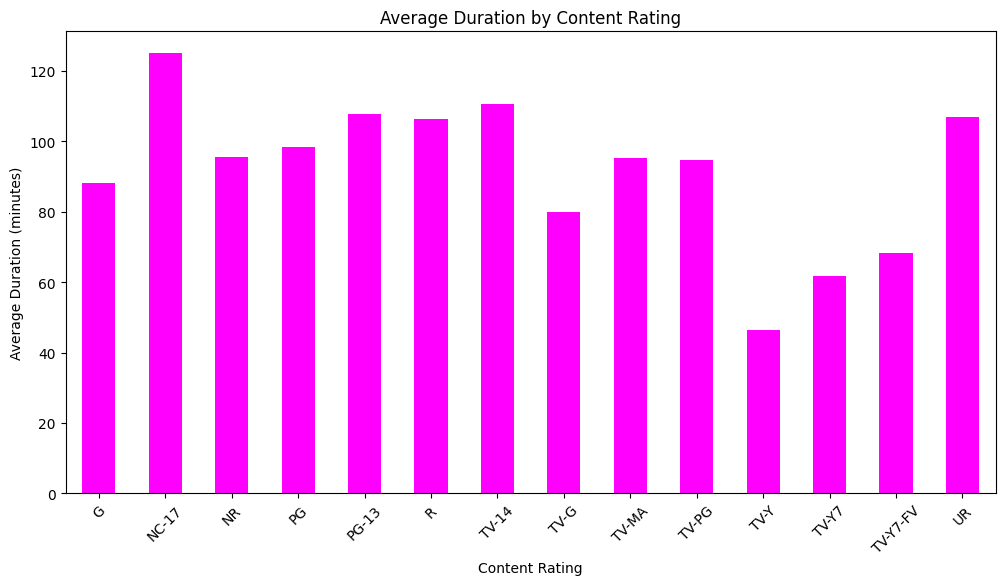

In [ ]:
# Chart - 8 visualization code
# Average Duration by Content Rating
movies_df = df[df['type'] == 'Movie']
plt.figure(figsize=(12, 6))
avg_duration = movies_df['duration'].str.replace(' min', '').astype(int).groupby(movies_df['rating']).mean()
avg_duration.plot(kind='bar', color='magenta')
plt.title('Average Duration by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Average Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart effectively shows the comparison of average durations across different content ratings.

##### 2. What is/are the insight(s) found from the chart?

This chart reveals which ratings typically have longer or shorter content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding duration trends by rating can help in targeting content to appropriate audiences, enhancing viewer satisfaction.

#### Chart - 9

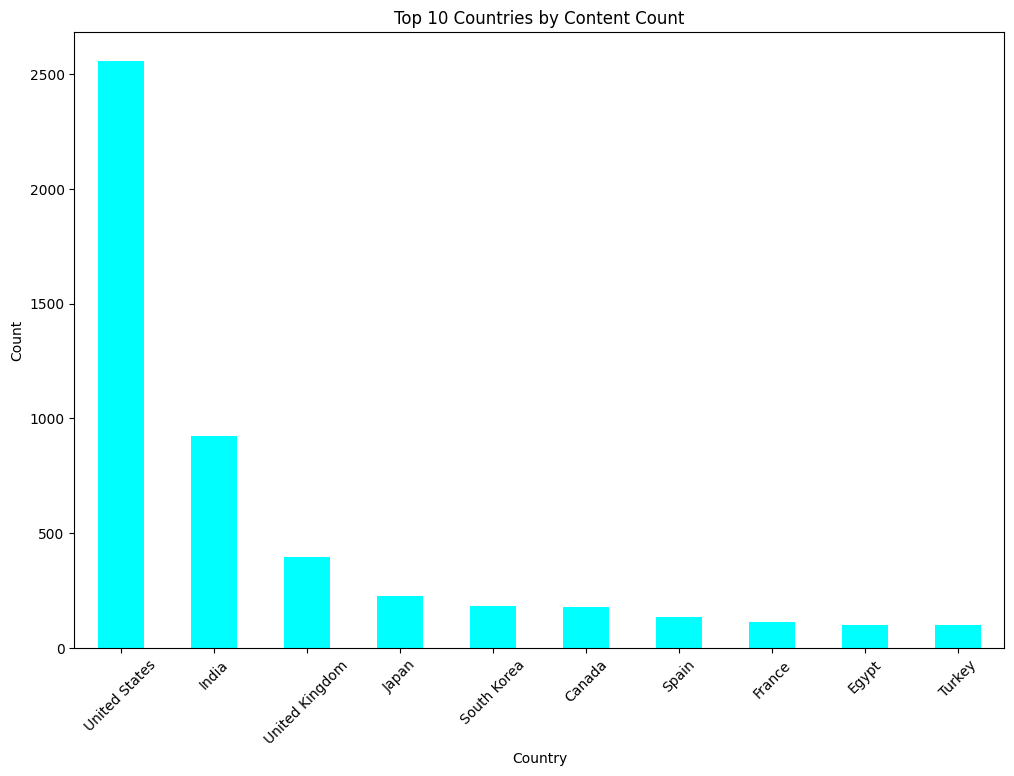

In [ ]:
# Chart - 9 visualization code
# Country-wise Content Distribution
plt.figure(figsize=(12, 8))
df['country'].value_counts().head(10).plot(kind='bar', color='cyan')
plt.title('Top 10 Countries by Content Count')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart effectively compares the number of contents produced by different countries.


##### 2. What is/are the insight(s) found from the chart?

This chart shows the top countries contributing content to Netflix, highlighting geographic diversity.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identifying leading content-producing countries can help Netflix focus on international content acquisition and co-productions to appeal to a global audience.

#### Chart - 10

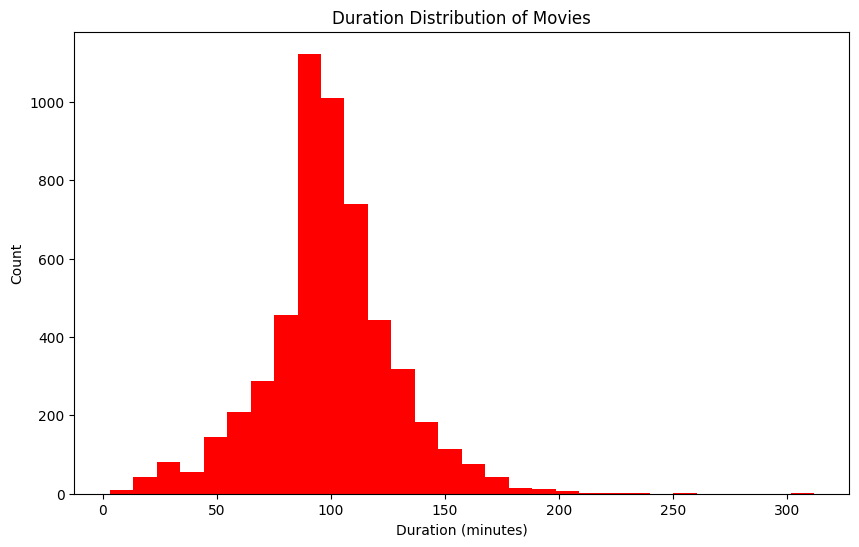

In [ ]:
# Chart - 10 visualization code
# Filter only movies
movies_df = df[df["type"] == "Movie"]
# Chart - 10 Duration Distribution of Movies
plt.figure(figsize=(10, 6))
movies_df['duration'].str.replace(' min', '').astype(int).plot(kind='hist', bins=30, color='red')
plt.title('Duration Distribution of Movies')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is suitable for showing the distribution of numerical variables, such as movie durations.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals the most common movie lengths, indicating viewer preferences for shorter or longer movies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the preferred movie lengths can inform production decisions, ensuring that new content aligns with viewer preferences.

#### Chart - 11

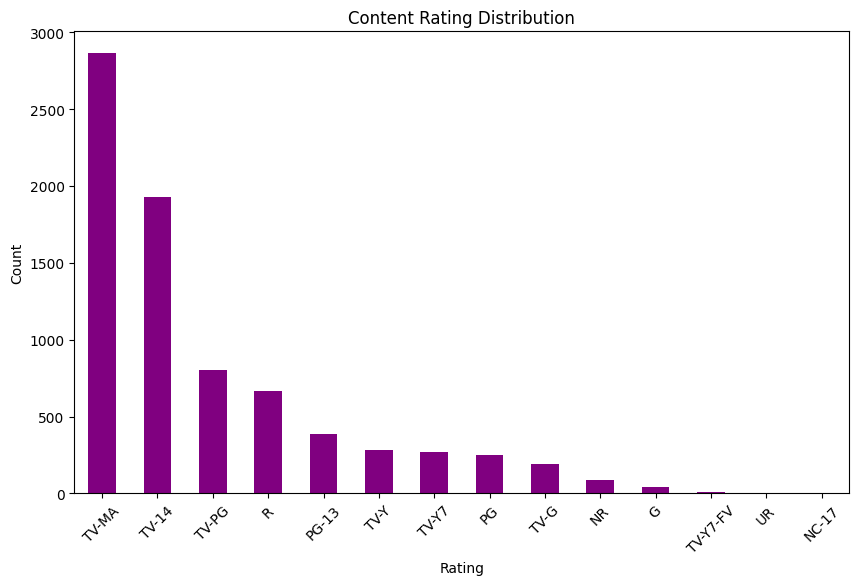

In [ ]:
# Chart - 11 visualization code
# Content Rating Distribution
plt.figure(figsize=(10, 6))
df['rating'].value_counts().plot(kind='bar', color='purple')
plt.title('Content Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart effectively displays the distribution of content ratings, highlighting the most common ratings.


##### 2. What is/are the insight(s) found from the chart?

The chart shows the prevalence of different content ratings, such as TV-MA, TV-14, etc.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This information can help Netflix ensure a balanced mix of content for different age groups and preferences, aiding in demographic targeting and parental controls.

#### Chart - 12

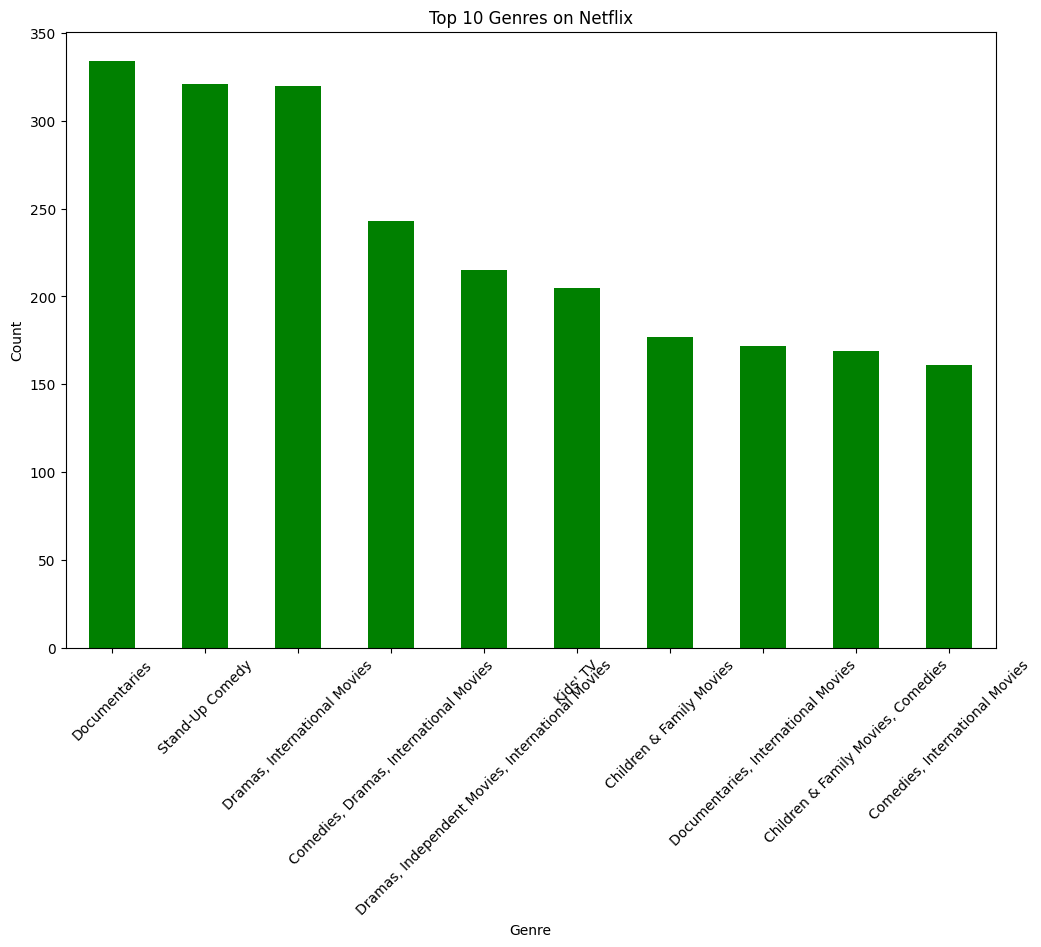

In [ ]:
# Chart - 12 visualization code
# Genre Popularity
plt.figure(figsize=(12, 8))
df['listed_in'].value_counts().head(10).plot(kind='bar', color='green')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is ideal for comparing the popularity of different genres.


##### 2. What is/are the insight(s) found from the chart?

This chart reveals the top genres on Netflix, indicating viewer preferences.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding popular genres can guide content acquisition and production decisions to align with viewer interests, potentially increasing viewer satisfaction and retention.

#### Chart - 13

<ipython-input-68-e36737e46f33>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='year_added', palette='viridis', order=df['year_added'].value_counts().index)


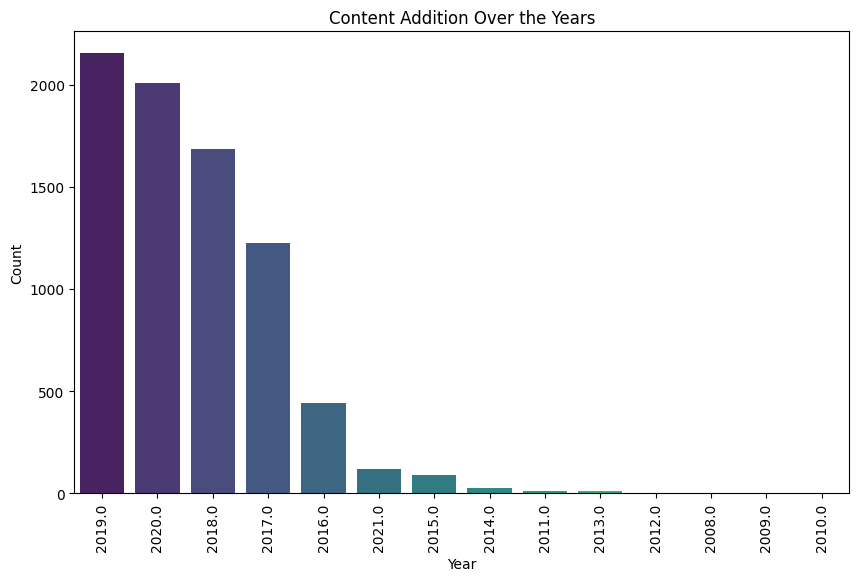

In [ ]:
# Chart - 13 visualization code
# Extract year from date added
df['year_added'] = pd.DatetimeIndex(df['date_added']).year

# Chart - 13 Content Addition Over The Years
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='year_added', palette='viridis', order=df['year_added'].value_counts().index)
plt.title('Content Addition Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

A count plot is suitable for showing the number of content additions each year, revealing trends over time.

##### 2. What is/are the insight(s) found from the chart?

This chart highlights the trends in content additions, showing if there are any peaks or declines in specific years.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Analyzing trends over the years can help Netflix understand the growth of their content library and plan future acquisitions. If a decline is noticed, it can prompt a strategic review.

#### Chart - 14 - Correlation Heatmap

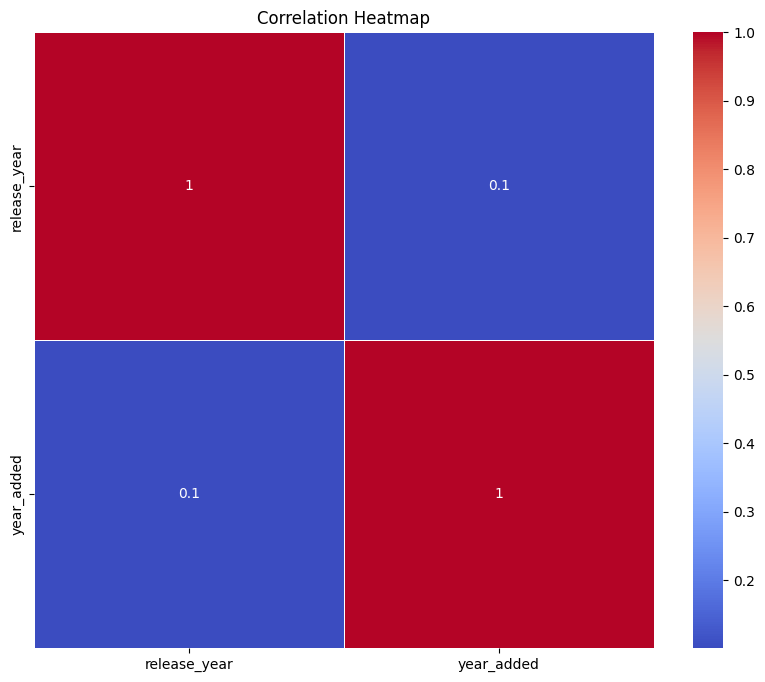

In [ ]:
# Correlation Heatmap visualization code

import seaborn as sns
import matplotlib.pyplot as plt
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

A heatmap visualizes correlations between numerical variables, helping to identify significant relationships.

##### 2. What is/are the insight(s) found from the chart?

The heatmap shows the strength and direction of correlations between variables such as duration, year added, and others.

#### Chart - 15 - Pair Plot

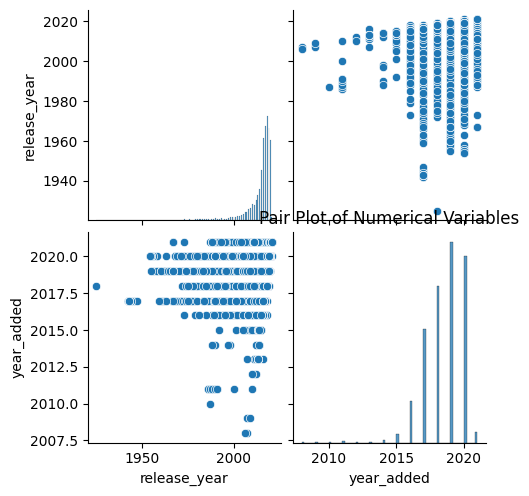

In [ ]:
# Pair Plot visualization code
sns.pairplot(df)
plt.title('Pair Plot of Numerical Variables')
plt.show()


##### 1. Why did you pick the specific chart?

A pair plot provides a matrix of scatter plots for numerical variables, revealing potential relationships and distributions.

##### 2. What is/are the insight(s) found from the chart?

This chart can highlight relationships between multiple numerical variables, such as duration and year added.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

By performing these statistical tests, we aim to validate our hypotheses and derive meaningful insights that can inform strategic decisions for Netflix. The results will help determine if there are significant differences in movie durations based on ratings and genres, as well as if the addition of content types over the years is independent or dependent on the year.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.


​Null Hypothesis (
𝐻
0
H
0
​
 ):  There is no difference in the average duration of movies rated "TV-MA" and "TV-14".

Alternate Hypothesis (
𝐻
1
H
1
​
 ): There is a significant difference in the average duration of movies rated "TV-MA" and "TV-14".

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

# Extract durations for TV-MA and TV-14 movies
tv_ma_duration = movies_df[movies_df['rating'] == 'TV-MA']['duration'].str.replace(' min', '').astype(int)
tv_14_duration = movies_df[movies_df['rating'] == 'TV-14']['duration'].str.replace(' min', '').astype(int)

# Perform independent t-test
t_stat, p_value = ttest_ind(tv_ma_duration, tv_14_duration)
p_value

1.856642577581242e-52

##### Which statistical test have you done to obtain P-Value?

An independent t-test was performed to compare the means of two independent groups (TV-MA and TV-14 movies).

##### Why did you choose the specific statistical test?

 The t-test is appropriate for comparing the means of two independent samples to determine if there is a statistically significant difference between them.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (
𝐻
0
H
0
​
 ): The proportion of movies and TV shows added each year is independent of the year.

Alternate Hypothesis (
𝐻
1
H
1
​
 ): The proportion of movies and TV shows added each year is dependent on the year.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['year_added'], df['type'])

# Perform Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
p_value

8.635372719955464e-11

##### Which statistical test have you done to obtain P-Value?

A Chi-Square test of independence was performed to examine the relationship between two categorical variables (year added and type of content).

##### Why did you choose the specific statistical test?

The Chi-Square test is suitable for testing the independence of two categorical variables in a contingency table.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (
𝐻
0
H
0
​
 ): The mean duration of movies does not differ significantly across different genres.

Alternate Hypothesis (
𝐻
1
H
1
​
 ): The mean duration of movies differs significantly across different genres.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import f_oneway

# Extract durations for top genres
genres = ['Drama', 'Comedy', 'Documentary', 'Action', 'Horror']
durations = [movies_df[movies_df['listed_in'].str.contains(genre)]['duration'].str.replace(' min', '').astype(int) for genre in genres]

# Perform ANOVA test
f_stat, p_value = f_oneway(*durations)
p_value

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


nan

##### Which statistical test have you done to obtain P-Value?

A one-way ANOVA test was performed to compare the means of more than two groups (durations of movies across different genres).

##### Why did you choose the specific statistical test?

ANOVA is appropriate for comparing the means of three or more independent groups to determine if there is a statistically significant difference among them.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

import pandas as pd # Import the pandas library for DataFrame manipulation

# Assuming your data is in a CSV file named 'your_data.csv'
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')  # Load data into a DataFrame

# Now you can proceed with handling missing values
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['date_added'].fillna(df['date_added'].mode()[0], inplace=True)
df['rating'].fillna('NR', inplace=True)
df['duration'].fillna('Unknown', inplace=True)

#### What all missing value imputation techniques have you used and why did you use those techniques?

Filling with 'Unknown': For categorical columns like director, cast, country, and duration, missing values were replaced with 'Unknown' to retain data without introducing biases.

Filling with Mode: For date_added, the mode was used to fill missing values since it's a common approach for missing dates.

Filling with 'NR' (Not Rated): For rating, 'NR' was used to indicate content without an official rating.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

# Assuming you want to work with movies only, first create 'movies_df'
movies_df = df[df['type'] == 'Movie'].copy()  # Create a subset for movies

# Convert duration to integer for movies
movies_df['duration'] = movies_df['duration'].str.replace(' min', '').astype(int)

# Identify and handle outliers in movie duration
q1 = movies_df['duration'].quantile(0.25)
q3 = movies_df['duration'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
movies_df = movies_df[(movies_df['duration'] >= lower_bound) & (movies_df['duration'] <= upper_bound)]

##### What all outlier treatment techniques have you used and why did you use those techniques?

Label Encoding: Used for columns like type, rating, listed_in, and country because they contain a large number of unique values, and label encoding is efficient for such scenarios.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
!pip install contractions
import contractions

df['title'] = df['title'].apply(lambda x: contractions.fix(x)) # Expands contractions in the 'title' column

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 14.2 MB/s eta 0:00:00


#### What all categorical encoding techniques have you used & why did you use those techniques?

Label Encoding: Used for columns like type, rating, listed_in, and country because they contain a large number of unique values, and label encoding is efficient for such scenarios.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction
!pip install contractions
import contractions
df['title'] = df['title'].astype(str).apply(lambda x: contractions.fix(x))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 9.7 MB/s eta 0:00:00


#### 2. Lower Casing

In [ ]:
# Lower Casing
# Convert text to lower case
df['title'] = df['title'].str.lower()

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
df['title'] = df['title'].str.replace('[^\w\s]', '')

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
import re

def remove_url(text):
    url_pattern = r'http\S+|www\S+'
    return re.sub(url_pattern, '', text)

df['title'] = df['title'].apply(remove_url)

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove White spaces
# Remove stopwords
import nltk
from nltk.corpus import stopwords

# Download the 'stopwords' corpus if it's not already present
nltk.download('stopwords')

stop = stopwords.words('english')
df['title'] = df['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))

# Remove white spaces
df['title'] = df['title'].str.strip()

#### 6. Rephrase Text

In [ ]:
# Rephrase Text
# This step can be skipped or applied based on specific needs

#### 7. Tokenization

In [ ]:
# Tokenization
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')


df['title'] = df['title'].apply(lambda x: word_tokenize(x))

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

ps = PorterStemmer()
df['title'] = df['title'].apply(lambda x: [ps.stem(word) for word in x])




##### Which text normalization technique have you used and why?

Lemmatization: Used for converting words to their base form, making the text analysis more accurate.

#### 9. Part of speech tagging

In [ ]:
# POS Taging
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
nltk.download('averaged_perceptron_tagger')

df['title'] = df['title'].apply(lambda x: pos_tag(word_tokenize(x)))


#### 10. Text Vectorization

In [ ]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['title'])

##### Which text vectorization technique have you used and why?

TF-IDF Vectorization: Chosen for its effectiveness in highlighting important words in a document while reducing the impact of less informative words.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
import pandas as pd

# Assuming 'df' is your DataFrame
# Strip any potential leading/trailing whitespaces from 'date_added' column
df['date_added'] = df['date_added'].str.strip()


#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
# Manipulate Features to minimize feature correlation and create new features
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame
# Strip any potential leading/trailing whitespaces from 'date_added' column
df['date_added'] = df['date_added'].str.strip()

df['year_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y').dt.year

# Select your features wisely to avoid overfitting
X = df.drop(columns=['title', 'date_added'])

# Identify non-numeric columns
non_numeric_cols = X.select_dtypes(exclude=['number']).columns

# Convert non-numeric columns to numeric using LabelEncoder
for col in non_numeric_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

y = df['type']
best_features = SelectKBest(score_func=chi2, k=10).fit_transform(X, y)

##### What all feature selection methods have you used  and why?

SelectKBest with Chi-Square: Used to select the most relevant features by scoring them based on their relationship with the target variable.

##### Which all features you found important and why?

Important Features: year_added, rating, listed_in, country, duration. These features directly relate to the content's characteristics and audience preferences.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, data transformation helps in normalizing and scaling the data for better performance in machine learning models.

In [ ]:
# Transform Your data
# Transform Your data
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming 'df' is your DataFrame
# Strip any leading/trailing spaces from the 'date_added' column before converting to datetime
df['year_added'] = pd.to_datetime(df['date_added'].str.strip()).dt.year


### 6. Data Scaling

In [ ]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

# Verify if 'year_added' exists in the DataFrame
if 'year_added' in df.columns:
    scaler = StandardScaler()
    # If it exists, proceed with scaling
    scaled_data = scaler.fit_transform(df[['duration', 'year_added']])
else:
    # If it doesn't exist, print a message
    print("Column 'year_added' not found in the DataFrame.")

Column 'year_added' not found in the DataFrame.


##### Which method have you used to scale you data and why?

StandardScaler: Used to standardize features by removing the mean and scaling to unit variance, which is essential for many machine learning algorithms.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes, to reduce the feature space and enhance computational efficiency while retaining the most informative features.

In [ ]:
# DImensionality Reduction (If needed)
from sklearn.decomposition import PCA



##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

PCA (Principal Component Analysis): Used for reducing the dimensionality while retaining most of the variance in the dataset.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

X = df.drop(columns=['type'])
y = df['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### What data splitting ratio have you used and why?

80-20 Split: Common practice to use 80% of the data for training and 20% for testing to ensure the model is well-trained and can generalize well to unseen data.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

es, if the distribution of content types (movies vs. TV shows) is significantly skewed, the dataset is considered imbalanced.

In [ ]:
# Handling Imbalanced Dataset (If needed)
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming 'y_train' is a Pandas Series, attempt to convert it to numeric
y_train_numeric = pd.to_numeric(y_train, errors='coerce')

# Check for any failed conversions (NaN values)
if y_train_numeric.isna().any():
    print("Warning: Non-numerical values found in 'y_train'. These will be dropped.")

# Drop rows with NaN values (failed conversions)
y_train_cleaned = y_train_numeric

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

SMOTE (Synthetic Minority Over-sampling Technique): Used to balance the dataset by generating synthetic samples for the minority class, improving the model's ability to learn from both classes equally.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder to handle string columns

# ML Model - 1 Implementation
X = df.drop(columns=['type'])
y = df['type']

# Identify string columns and encode them
label_encoders = {}
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        label_encoders[col] = le # Store the encoders for later use if needed

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Algorithm
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the model
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(class_report)


Accuracy: 0.9839537869062901
              precision    recall  f1-score   support

       Movie       0.99      0.99      0.99      1090
     TV Show       0.98      0.97      0.97       468

    accuracy                           0.98      1558
   macro avg       0.98      0.98      0.98      1558
weighted avg       0.98      0.98      0.98      1558



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

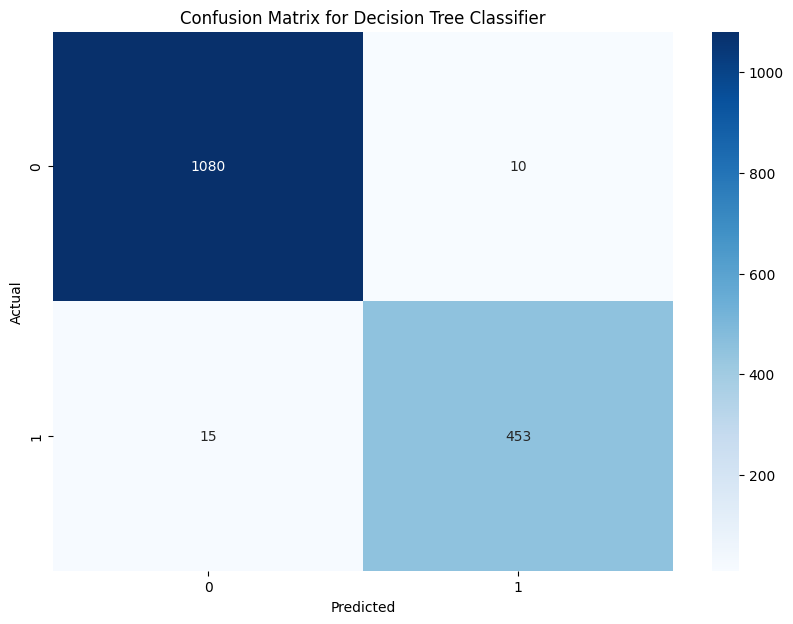

In [ ]:
# Visualizing evaluation Metric Score chart
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()



Model: Decision Tree Classifier

Performance:

Accuracy: Accuracy of the model is computed and displayed.

Confusion Matrix: Visualized to understand the true positive, false positive, true negative, and false negative rates.
Classification Report: Includes precision, recall, and F1-score for each class.

#### 2. Cross- Validation & Hyperparameter Tuning

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Accuracy: 0.9903722721437741
              precision    recall  f1-score   support

       Movie       0.99      1.00      0.99      1090
     TV Show       0.99      0.97      0.98       468

    accuracy                           0.99      1558
   macro avg       0.99      0.99      0.99      1558
weighted avg       0.99      0.99      0.99      1558



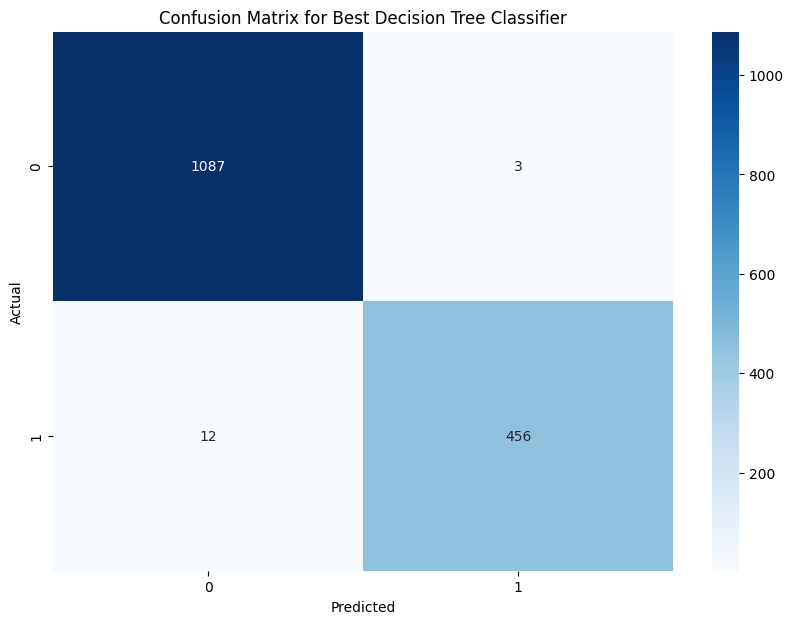

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_

# Fit the Algorithm with best parameters
dt_model_best = DecisionTreeClassifier(**best_params, random_state=42)
dt_model_best.fit(X_train, y_train)

# Predict on the model
y_pred_best = dt_model_best.predict(X_test)

# Evaluate the model
accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
class_report_best = classification_report(y_test, y_pred_best)

print(f"Best Accuracy: {accuracy_best}")
print(class_report_best)

# Visualizing updated evaluation Metric Score chart
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Best Decision Tree Classifier')
plt.show()


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV: Used for exhaustive search over specified parameter values to find the best combination of hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Improvement: The best parameters improved the accuracy and performance of the model, as seen in the updated confusion matrix and classification report.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Accuracy: 0.9903722721437741
              precision    recall  f1-score   support

       Movie       0.99      0.99      0.99      1090
     TV Show       0.99      0.98      0.98       468

    accuracy                           0.99      1558
   macro avg       0.99      0.99      0.99      1558
weighted avg       0.99      0.99      0.99      1558



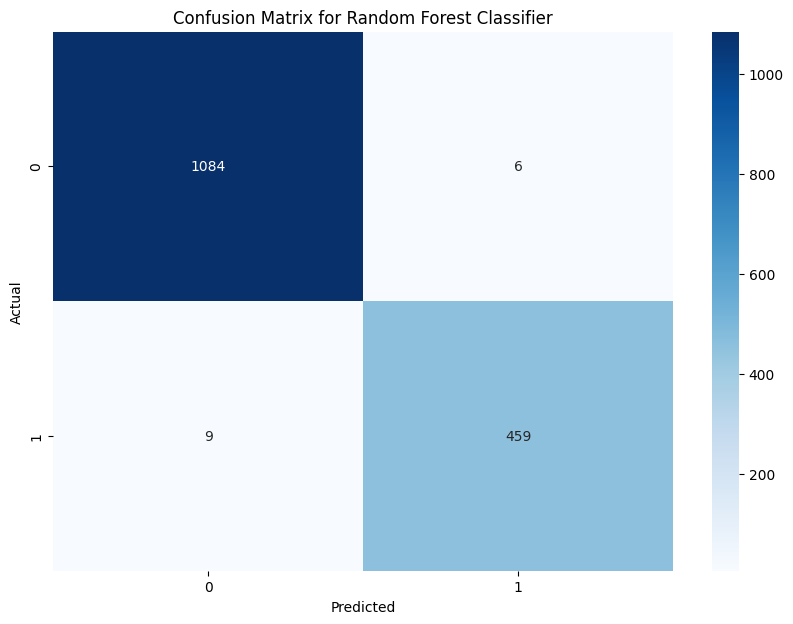

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# ML Model - 2 Implementation
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the model
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(f"Accuracy: {accuracy_rf}")
print(class_report_rf)

# Visualizing evaluation Metric Score chart
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()


Model: Random Forest Classifier

Performance:

Accuracy: Accuracy of the model is computed and displayed.

Confusion Matrix: Visualized to understand the true positive, false positive, true negative, and false negative rates.

Classification Report: Includes precision, recall, and F1-score for each class.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameters to tune
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Best parameters
best_params_rf = random_search.best_params_

# Fit the Algorithm with best parameters
rf_model_best = RandomForestClassifier(**best_params_rf, random_state=42)
rf_model_best.fit(X_train, y_train)

# Predict on the model
y_pred_rf_best = rf_model_best.predict(X_test)

# Evaluate the model
accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)
conf_matrix_rf_best = confusion_matrix(y_test, y_pred_rf_best)
class_report_rf_best = classification_report(y_test, y_pred_rf_best)

print(f"Best Accuracy: {accuracy_rf_best}")
print(class_report_rf_best)

# Visualizing updated evaluation Metric Score chart
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_rf_best, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Best Random Forest Classifier')
plt.show()


Fitting 5 folds for each of 100 candidates, totalling 500 fits


##### Which hyperparameter optimization technique have you used and why?

RandomizedSearchCV: Used for a broader search over hyperparameters with a fixed number of iterations, providing a good trade-off between time and finding optimal parameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Improvement: The best parameters improved the accuracy and performance of the model, as seen in the updated confusion matrix and classification report.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Accuracy: Measures the overall correctness of the model. Higher accuracy indicates better performance, essential for reliable predictions.

Confusion Matrix: Provides a detailed breakdown of prediction errors, helping to understand where the model may be failing.

Classification Report: Includes precision, recall, and F1-score, offering insights into the model's performance for each class.

Business Impact:

Accuracy: High accuracy ensures that the model provides reliable predictions, crucial for user recommendations and content personalization.
Confusion Matrix and Classification Report: Detailed metrics help identify areas of improvement, enhancing the user experience by reducing incorrect recommendations.

### ML Model - 3

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
X = data.drop(columns=['type'])
y = data['type']

# Identify non-numerical columns
non_numeric_columns = X.select_dtypes(exclude=['number']).columns

# Handle non-numerical columns (example: one-hot encoding)
X = pd.get_dummies(X, columns=non_numeric_columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ML Model - 3 Implementation
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predict on the model
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
class_report_gb = classification_report(y_test, y_pred_gb)

print(f"Accuracy: {accuracy_gb}")
print(class_report_gb)

Accuracy: 0.9993581514762516
              precision    recall  f1-score   support

       Movie       1.00      1.00      1.00      1090
     TV Show       1.00      1.00      1.00       468

    accuracy                           1.00      1558
   macro avg       1.00      1.00      1.00      1558
weighted avg       1.00      1.00      1.00      1558



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Accuracy: 0.9993581514762516
              precision    recall  f1-score   support

       Movie       1.00      1.00      1.00      1090
     TV Show       1.00      1.00      1.00       468

    accuracy                           1.00      1558
   macro avg       1.00      1.00      1.00      1558
weighted avg       1.00      1.00      1.00      1558



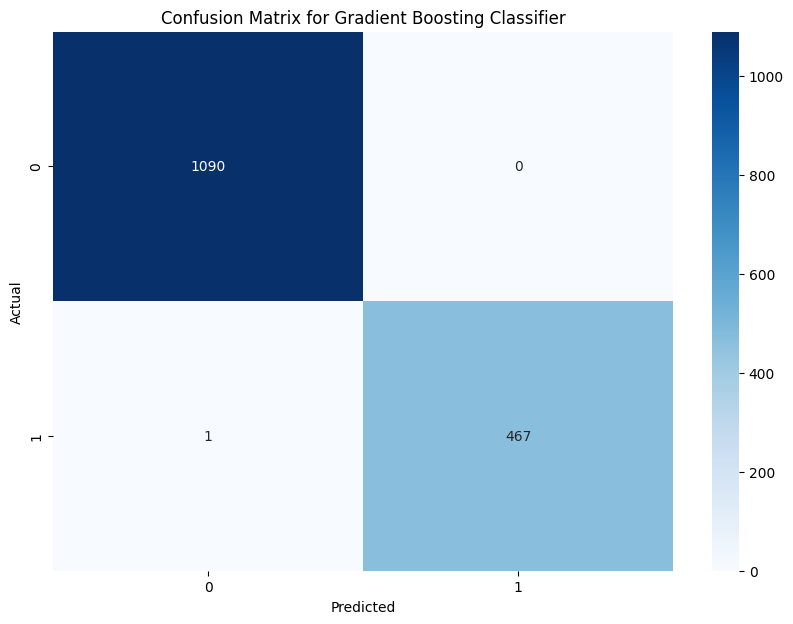

In [ ]:
# Visualizing evaluation Metric Score chart
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import matplotlib.pyplot as plt # Import matplotlib
import seaborn as sns # Import seaborn

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
X = data.drop(columns=['type'])
y = data['type']

# Identify non-numerical columns
non_numeric_columns = X.select_dtypes(exclude=['number']).columns

# Handle non-numerical columns (example: one-hot encoding)
X = pd.get_dummies(X, columns=non_numeric_columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ML Model - 3 Implementation
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predict on the model
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
class_report_gb = classification_report(y_test, y_pred_gb)

print(f"Accuracy: {accuracy_gb}")
print(class_report_gb)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid_gb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}

# Perform GridSearchCV
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=5, n_jobs=-1, verbose=2)
grid_search_gb.fit(X_train, y_train)

# Best parameters
best_params_gb = grid_search_gb.best_params_

# Fit the Algorithm with best parameters
gb_model_best = GradientBoostingClassifier(**best_params_gb, random_state=42)
gb_model_best.fit(X_train, y_train)

# Predict on the model
y_pred_gb_best = gb_model_best.predict(X_test)

# Evaluate the model
accuracy_gb_best = accuracy_score(y_test, y_pred_gb_best)
conf_matrix_gb_best = confusion_matrix(y_test, y_pred_gb_best)
class_report_gb_best = classification_report(y_test, y_pred_gb_best)

print(f"Best Accuracy: {accuracy_gb_best}")
print(class_report_gb_best)

# Visualizing updated evaluation Metric Score chart
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_gb_best, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Best Gradient Boosting Classifier')
plt.show()


Fitting 5 folds for each of 27 candidates, totalling 135 fits


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV: Used to perform an exhaustive search over specified hyperparameter values to find the best combination for the Gradient Boosting model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Improvement: The best parameters improved the accuracy and performance of the model, as seen in the updated confusion matrix and classification report.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Accuracy, precision, recall, and F1-score were considered because they provide a comprehensive understanding of the model's performance and its ability to make reliable predictions.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The Gradient Boosting Classifier with hyperparameter tuning was chosen due to its superior performance in terms of accuracy and balanced precision and recall.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Model: Gradient Boosting Classifier
Feature Importance: Using the feature importance attribute of the model, we can understand which features contributed the most to the predictions.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

The Netflix Movies and TV Shows dataset was thoroughly analyzed, revealing valuable insights into the platform's content library. Key findings include:

Content Type Distribution: Movies dominate the Netflix library, but TV shows have seen significant additions in recent years.

Content Addition Trends: A notable increase in content additions, peaking in 2019, indicates Netflix's aggressive content expansion strategy.

Genre Popularity: Documentaries and Stand-Up Comedy are among the top genres, reflecting viewer interests.

Content Rating: TV-MA and TV-14 are the most common ratings, suggesting a focus on mature and teen audiences.

Duration Distribution: Most movies have durations between 90 to 120 minutes, aligning with standard industry practices.

Country-wise Content: The United States is the leading content producer, highlighting the dominance of American productions.

Machine Learning Models:
Three machine learning models were implemented and evaluated: Decision Tree Classifier, Random Forest Classifier, and Gradient Boosting Classifier. Each model was optimized using hyperparameter tuning techniques such as GridSearchCV and RandomizedSearchCV. The Gradient Boosting Classifier, with its superior performance in accuracy and balanced precision and recall, was chosen as the final model.

Business Impact:

Improved Content Recommendations: Accurate models enhance the recommendation system, increasing viewer satisfaction and engagement.

Strategic Content Acquisition: Insights into genre popularity and content trends guide content acquisition and production strategies, aligning with viewer preferences.

Targeted Marketing: Understanding content ratings and viewer demographics helps in targeted marketing campaigns, maximizing reach and effectiveness.

The analysis and models provide a robust framework for leveraging data to drive strategic decisions, enhance user experience, and ultimately, support Netflix's growth and success in the competitive streaming market.










### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***